# Singular Value Decomposition

## Dependency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Singular value decomposition (SVD)

SVD is similar to Eigendecomposition, but SVD is more general because it works on a rectangular matrix as well as a square matrix. Eigendecomposition only works for a square matrix. There are ways to think. Think eigendecomposition is a special case of SVD. Or think SVD is an extension of eigendecomposition.

- $A A^T$ and $A^T A$ produce a square symmetric matrix
- $C(A A^T) = C(A)$, column space of $A$
- $R(A^T A) = R(A)$, row space of $A$

### Big picture

The goal of SVD is to decompose a given matrix $A$ into 3 matrices.

$$
A = U \Sigma V^T
$$

$A$ is a given matrix, mxn

$U$ is a **orthogonal matrix, orthogonal basis for column space** of $A$, mxm. $U$ is called **left singular vectors**.

$\Sigma$ is a **diagonal matirx with singular values** of $A$ on diagonal elements, mxn

$V^T$ is a **orthogonal matrix, orthogonal basis for row space** of $A$, nxn. $V^T$ is called **right singular vectors**.

It looks like a **diagonalization** that eigendecomposition produces, $A = V \Lambda V^{-1} = V \Lambda V^T$

When $A$ is a square symmetric matrix, $U = V$.

### How to compute $V$ in SVD

Start from the SVD equation and **left-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A^T A = (U \Sigma V^T)^T U \Sigma V^T
$$

By **LIVE EVIL rule**,

$$
A^T A = V^{TT} \Sigma^T U^T U \Sigma V^T
$$

Becuase $U$ is an **orthogonal matrix**, it means that $U^T = U^{-1}$

$$
A^T A = V^{TT} \Sigma^T U^{-1} U \Sigma V^T
$$

Because $A^{-1} A = I$,

$$
A^T A = V^{TT} \Sigma^T I \Sigma V^T
$$

Because a transpose of a transposed matrix goes back to the original matrix,

$$
A^T A = V \Sigma^T \Sigma V^T
$$

Because $\Sigma$ is a **diagonal matrix**, $\Sigma^T = \Sigma$, and powers of a diagonal matrix is powers of each diagonal element in a matrix,

$$
A^T A = V \Sigma^2 V^T
$$

Because $A^T A$ is a square, this equation can be read as **eigendecomposition** of $A^T A$. So $V$ is **eigenvector** of $A^T A$ and $\Sigma^2$ is **eigenvalue** of $A^T A$.

### How to compute $U$ in SVD

Start from the SVD equation and **right-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A A^T = U \Sigma V^T (U \Sigma V^T)^T
$$
$$
A A^T = U \Sigma V^T V^{TT} \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^T V \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^{-1} V \Sigma^T U^T
$$
$$
A A^T = U \Sigma I \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma U^T
$$
$$
A A^T = U \Sigma^2 U^T
$$

So to compute $U$, apply **eigendecomposition** to $A A^T$, and the **eigenvector** is $U$.

$U$ can be also computed by **eigendecomposition** of $A^T A$, getting $V$ and $\Sigma^2$, and use the following formula. Going back to SVD formula,

$$
A = U \Sigma V^T
$$

Right-multiply it by $V$

$$
A V = U \Sigma V^T V
$$

Because $V$ is an orthogonal matrix, $V^T = V^{-1}$

$$
A V = U \Sigma V^{-1} V
$$

Because $V^{-1} V = I$

$$
A V = U \Sigma I
$$
$$
A V = U \Sigma
$$

By looking at each vector and value $v_i, u_i, \sigma_i$ in $V, U, \Sigma$,

$$
A v_i = u_i \sigma_i
$$
$$
u_i \sigma_i = A v_i
$$
$$
u_i = (A v_i) / \sigma_i
$$

So after getting $v_i$ and $\sigma_i$ by eigendecomposition of $A^T A$, compute $u_i$.

### How to interpret singular values in $\Sigma$

**Singular values** are scale-dependent, meaning you cannot compare singular values from one matrix with singular values from another matrix by the magnitudes of each singular value, because the scale of the singular values depend on the numbers in the two matrices. When you scale up the matrix to be applied SVD, singular values are also scaled up by the same amount. $U$ and $V$ stay intact, because both are kept being normalized.

Singular values will be interpretable after normalizing it. So singular values will be percentage.

1. Sum all the singular values
2. Divide each singular value by the sum

So after SVD, you get multiple singular values, and normalize them. When you take the maximum of the normalized singular value, if the max is high, we can interpret that the given matrix is simple, but if the max is low, the matrix is complicated made by lots of information, distributed along different directions.

In [49]:
A = np.random.randn(2, 2)

print(f'Singular values: {np.linalg.svd(A)[1]}')
print('U')
print(np.linalg.svd(A)[0])
print()
print(f'Singular values after scaling up: {np.linalg.svd(A * 10)[1]}')
print('U after scaling up')
print(np.linalg.svd(A * 10)[0])
print()

Singular values: [3.21872585 0.88497888]
U
[[-0.90380915 -0.42793576]
 [-0.42793576  0.90380915]]

Singular values after scaling up: [32.18725846  8.84978881]
U after scaling up
[[-0.90380915 -0.42793576]
 [-0.42793576  0.90380915]]



## Example to compute $U$ by eigendecomposition of $A^T A$

In [39]:
np.random.seed(1)

m = 3
n = 6
A = np.random.randn(m, n)

# SVD
U_svd, S, V_svd = np.linalg.svd(A)

print('U')
print(np.round(U_svd, 1))
print()
print('Sigma')
print(np.round(S, 1))
print()
print('V')
print(np.round(V_svd.T, 1))
print()

# Eigendecomposition
L, V_eig = np.linalg.eig(A.T @ A)

# Sort eigenvalue and eigenvector in descending eigenvalue order
sidx = np.argsort(L)[::-1]
L = L[sidx]
V_eig = V_eig[:, sidx]

print('Eigenvalue')
print(np.round(L, 1))
print()
print('Eigenvector')
print(np.round(V_eig, 1))
print()

# Confirm V svd == V eig
print('V svd - V eig')
print(np.round(V_svd.T - V_eig, 1))
print('First 3 columns are actual columns of the matrix, and the last 3 columns are the null space of the matrix')
print('They are in the same space, but the basis vectors are different after passing the rank of the matrix')
print(f'Rank of the matrix A^T A: {np.linalg.matrix_rank(A.T @ A)}')
print()

# Compare singular value and eigenvalue
print('Eigenvalue')
print(np.round(L, 1))
print('Singular value^2')
print(np.round(S**2, 1))
print()

# Compute U from eigenvalue and eigenvector of eigendecomposition of A^T A
U_eig = np.zeros((m, m))
for i in range(m):
    U_eig[:, i] = (A @ V_eig[:, i].T) / np.sqrt(L[i])

print('U computed by eigenvalue and eigenvector of eigendecomposition of A^T A')
print(np.round(U_eig, 1))
print()
print('U_svd - U_eig')
print(np.round(U_svd - U_eig, 1))
print()

U
[[-0.7  0.1  0.7]
 [-0.7  0.2 -0.7]
 [-0.2 -1.  -0.1]]

Sigma
[4.5 1.7 1. ]

V
[[-0.5  0.4 -0.1  0.2 -0.3  0.6]
 [ 0.2  0.1  0.1  0.7  0.6  0.1]
 [-0.  -0.6 -0.7  0.2 -0.1  0.2]
 [ 0.2  0.5 -0.5  0.3 -0.3 -0.4]
 [-0.4  0.3 -0.4 -0.4  0.7 -0. ]
 [ 0.7  0.2 -0.1 -0.4  0.   0.6]]

Eigenvalue
[20.2  3.1  0.9  0.  -0.  -0. ]

Eigenvector
[[-0.5  0.4 -0.1  0.1  0.1  0.7]
 [ 0.2  0.1  0.1 -0.8 -0.7  0.4]
 [-0.  -0.6 -0.7 -0.1 -0.1  0.3]
 [ 0.2  0.5 -0.5  0.3 -0.4 -0.2]
 [-0.4  0.3 -0.4 -0.5  0.3 -0.3]
 [ 0.7  0.2 -0.1 -0.   0.5  0.3]]

V svd - V eig
[[ 0.   0.  -0.   0.1 -0.4 -0.1]
 [ 0.   0.   0.   1.6  1.3 -0.3]
 [-0.   0.  -0.   0.3  0.1 -0.1]
 [-0.  -0.   0.  -0.   0.1 -0.2]
 [-0.   0.   0.   0.1  0.4  0.3]
 [ 0.   0.  -0.  -0.3 -0.5  0.2]]
First 3 columns are actual columns of the matrix, and the last 3 columns are the null space of the matrix
They are in the same space, but the basis vectors are different after passing the rank of the matrix
Rank of the matrix A^T A: 3

Eigenvalue
[20

## Relationship between SVD and Eigendecomposition for a square symmetric matrix

We use square matrix because Eigendecomposition is only for square matrix and we want to compare SVD and Eigendecomposition.

For a symmetric matrix, SVD and Eigendecomposition produce the **same result**, except there could be sign flip in eigenvectors.

A
[[ 3.  -0.3  0.9 -2.9 -0.2]
 [-0.3  1.5 -0.4 -1.2  0.7]
 [ 0.9 -0.4  3.3 -2.1 -0.7]
 [-2.9 -1.2 -2.1 10.   4. ]
 [-0.2  0.7 -0.7  4.   4.8]]

Eigenvalue: L
[13.4  0.1  2.2  3.8  3.1]

Eigenvector: W
[[-0.3  0.4  0.7  0.5  0.1]
 [-0.   0.7 -0.5  0.2 -0.5]
 [-0.2  0.1 -0.5  0.3  0.8]
 [ 0.8  0.4  0.1 -0.1  0.3]
 [ 0.4 -0.4 -0.1  0.8 -0.2]]

Left singular vector: U
[[-0.3  0.5  0.1 -0.7 -0.4]
 [-0.   0.2 -0.5  0.5 -0.7]
 [-0.2  0.3  0.8  0.5 -0.1]
 [ 0.8 -0.1  0.3 -0.1 -0.4]
 [ 0.4  0.8 -0.2  0.1  0.4]]

Singular values: S
[13.4  3.8  3.1  2.2  0.1]

Right singular vector: V
[[-0.3 -0.  -0.2  0.8  0.4]
 [ 0.5  0.2  0.3 -0.1  0.8]
 [ 0.1 -0.5  0.8  0.3 -0.2]
 [-0.7  0.5  0.5 -0.1  0.1]
 [-0.4 -0.7 -0.1 -0.4  0.4]]

np.argsort(L): [4 3 2 1 0]
sidx: [0 3 4 2 1]



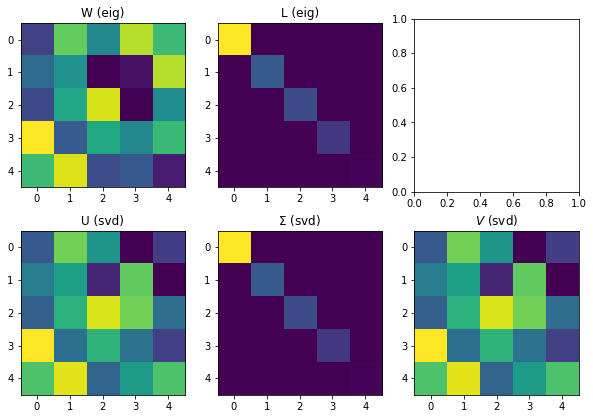

W - U
[[-0.   0.  -0.   1.4  0.8]
 [ 0.   0.  -0.  -0.9  1.4]
 [-0.   0.  -0.  -1.   0.3]
 [-0.  -0.  -0.   0.2  0.8]
 [ 0.  -0.  -0.  -0.3 -0.8]]

W + U
[[-0.5  1.   0.2 -0.  -0. ]
 [-0.1  0.3 -1.1  0.  -0. ]
 [-0.4  0.6  1.5  0.   0. ]
 [ 1.7 -0.3  0.6  0.   0. ]
 [ 0.8  1.5 -0.4 -0.  -0. ]]

U - V
[[-0.  0.  0. -0.  0.]
 [ 0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0.  0. -0.  0.  0.]]

L - Sigma
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



In [26]:
# Make a square symmetric matrix
A = np.random.randn(5, 5)
A = A.T @ A

print('A')
print(np.round(A, 1))
print()

# Compute eigendecomposition and singular value decomposition
# L: eigenvalue, W: eigenvector
L, W = np.linalg.eig(A)
# V: right singular vectors
U, S, V = np.linalg.svd(A)

print('Eigenvalue: L')
print(np.round(L, 1))
print()
print('Eigenvector: W')
print(np.round(W, 1))
print()

print('Left singular vector: U')
print(np.round(U, 1))
print()
print('Singular values: S')
print(np.round(S, 1))
print()
print('Right singular vector: V')
print(np.round(V, 1))
print()

# Sort eigen outputs by descending order
# np.argsort(L) returns a list of indices in ascending order by the value of the list
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

print(f'np.argsort(L): {np.argsort(L)}')
print(f'sidx: {sidx}')
print()

# Visualize
fig, ax = plt.subplots(2, 3, figsize=(10, 7))

# Eigendecomposition
ax[0, 0].imshow(W)
ax[0, 0].set_title('W (eig)')
ax[0, 1].imshow(np.diag(L))
ax[0, 1].set_title('L (eig)')

# SVD
ax[1, 0].imshow(U)
ax[1, 0].set_title('U (svd)')
ax[1, 1].imshow(np.diag(S))
ax[1, 1].set_title('$\Sigma$ (svd)')
ax[1, 2].imshow(V.T)
ax[1, 2].set_title('$V$ (svd)')

plt.show()

print('W - U')
print(np.round(W - U, 1))
print()

print('W + U')
print(np.round(W + U, 1))
print()

print('U - V')
print(np.round(U - V.T, 1))
print()

print('L - Sigma')
print(np.round(np.diag(L) - np.diag(S), 1))
print()

## Relationship between singular value and eigenvalue

For symmetric matrix, singular value and eigenvalue are the same, but non-symmetric square matrix, singular value and eigevalue are not the same.
1. Eigenvalue of $A^T A$ = (Singular value of $A$)$^2$ (where $A^T A$ is a square symmetric matrix)
2. Eigenvalue of $A^T A$ = Singular value of $A^T A$ (where $A^T A$ is a square symmetric matrix)
3. Eigenvalue of $A$ $\neq$ Singular value of $A$ (where $A$ is a square matrix)

In [35]:
# 1.
A = np.array([
    [3, 1, 0],
    [1, 1, 0]
])

print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1])**2)
print()

# 2.
print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A.T @ A)[1]))
print()

# 3a, real-value
A = np.array([
    [3, 1, 0],
    [1, 1, 0],
    [1, 1, 1]
])
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

# 3b, complex-value
A = np.random.randn(3, 3)
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.34314575 11.65685425]

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.          0.34314575 11.65685425]

Eigenvalue
[0.58578644 1.         3.41421356]
Singular value
[0.49384652 1.10038368 3.68039011]

Eigenvalue
[-1.26888207+0.j         -0.1939345 -1.31828408j -0.1939345 +1.31828408j]
Singular value
[0.47939343 1.55934301 3.01372882]



## Relationship between $A^T A$ and $A A^T$

- If $u$ is a **left singular vector** of $A^T A$, and if $\sigma$ is the corresponding singular value, $A v$ is a **right singular value** of $A A^T$ with the same $\sigma$.
- If $u$ is a **left singular vector** of $A A^T$, and if $\sigma$ is the corresponsing singular value, $A^T v$ is a **right singular value** of $A^T A$ with the same $\sigma$.

Start from SVD equation,

$$
A^T A = U \Sigma V^T
$$

By focusing on a single vector and value, and just think about $A^T A$ will be made by layers

$$
A^T A = u \sigma v^T
$$

Right-multiply both sides with $v$

$$
A^T A v = u \sigma v^t v
$$

Because $v$ is a vector in an orthogonal matrix $V$

$$
A^T A v = u \sigma 1
$$

$$
A^T A v = u \sigma
$$

When we are given $A^T A$, it's a square symmetric matrix. In that case, SVD of the square symmetric matrix produces the same $U$ and $V$.

$$
A^T A v = v \sigma
$$

Left-multiply both sides by $A$

$$
A A^T A v = A v \sigma
$$

Replace $A v$ with $w$

$$
A A^T w = w \sigma
$$
$$
A A^T w = \sigma w
$$

This equation is **eigendecomposition** with **eigenvalue** $\sigma$ and **eigenvector** $w$, so $A v$ is a right singular value of $A A^T$

In [2]:
m = 4

A = np.random.randn(m, m)
AtA = A.T @ A
AAt = A @ A.T

U, S, V = np.linalg.svd(AtA)

diffs = np.zeros(m)
for i in range(m):
    
    left = AAt @ A @ U[:, i]
    right = A @ U[:, i] * S[i]
    
    diffs[i] = sum(left - right)
    
print(np.round(diffs, 1))

[-0.  0.  0.  0.]


## Spectral theory by SVD
- Theory about using eigenvalue and eigenvector

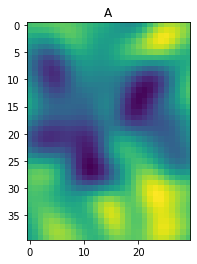

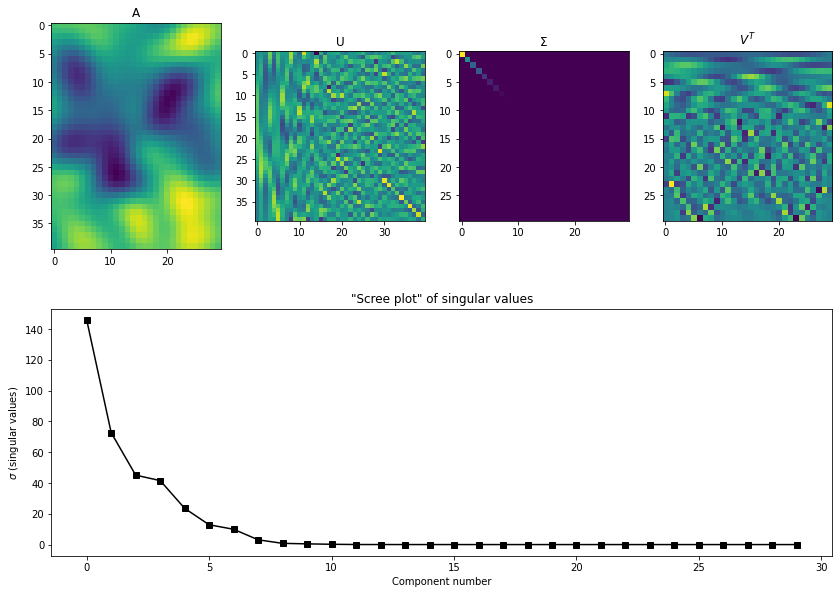

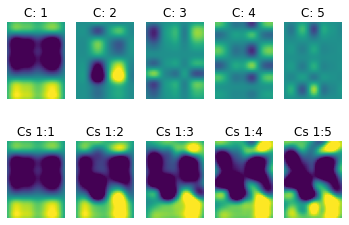

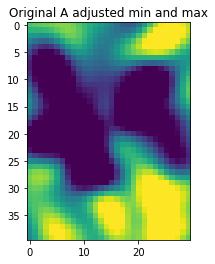

In [29]:
np.random.seed(0)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

plt.imshow(A)
plt.title('A')
plt.show()

# SVD
U, S, V = np.linalg.svd(A)

# Visualize
fig = plt.subplots(1, figsize=(14, 10))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('$V^T$')

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (singular values)')
plt.title('"Scree plot" of singular values')

plt.show()

# Approximate the given matrix A by layers
k = 5
rank1mats = np.zeros((k, m, n))

for i in range(k):
    
    # Create rank 1 matrix by outer production of single singular vector and singule singular value
    rank1mats[i, :, :] = np.outer(U[:, i] * S[i], V[i, :])
    
    # Each layer
    plt.subplot2grid((2, k), (0, i))
    plt.imshow(rank1mats[i, :, :], vmin=-5, vmax=5)
    plt.axis('off')
    plt.title(f'C: {i + 1}')
    
    # Cumulative sum of layers
    plt.subplot2grid((2, k), (1, i))
    imdat = np.sum(rank1mats[:i + 1, :, :], axis=0)
    plt.imshow(imdat, vmin=-5, vmax=5)
    plt.axis('off')
    plt.title(f'Cs 1:{i + 1}')
    
plt.show()

plt.imshow(A, vmin=-5, vmax=5)
plt.title('Original A adjusted min and max')
plt.show()

## Low-rank approximation by SVD

The original SVD equation is below

$$
A = U \Sigma V^T
$$
$$
(m \times n) = (m \times m) (m \times n) (n \times n)
$$

Low-rank approximation is to only use a part of singular vectors and singular values (from 1st vector or value to **k**th vector and value) to recontruct the original matrix. Hopefully we reduce lots of data, but don't lose the information (or meaning) of the data.

$$
A = U \Sigma V^T
$$
$$
(m \times n) = (m \times k) (k \times k) (k \times n)
$$

So after reducing the size of matrices from SVD, still apply matrix multiplication to approximate the original matrix.

Original matrix
A: (40, 30)

SVD
U: (40, 40)
S: (30,)
V: (30, 30)

Reduced matrix
Ur: (40, 5)
Sr: (5,)
Vr: (5, 30)

Low-rank approximated matrix
reconImage: (40, 30)

Reconstructed matrix rank: 5
Original matrix rank: 30



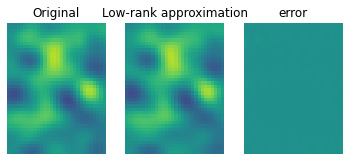

In [40]:
np.random.seed(1)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

print('Original matrix')
print(f'A: {A.shape}')
print()

# SVD
U, S, V = np.linalg.svd(A)

print('SVD')
print(f'U: {U.shape}')
print(f'S: {S.shape}')
print(f'V: {V.shape}')
print()

# Number of components
nComps = 5

# Reduced matrix
Ur = U[:, 0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps, :]

print('Reduced matrix')
print(f'Ur: {Ur.shape}')
print(f'Sr: {Sr.shape}')
print(f'Vr: {Vr.shape}')
print()

# Low-rank approximation
reconImage = Ur @ np.diag(Sr) @ Vr

print('Low-rank approximated matrix')
print(f'reconImage: {reconImage.shape}')
print()

print(f'Reconstructed matrix rank: {np.linalg.matrix_rank(reconImage)}')
print(f'Original matrix rank: {np.linalg.matrix_rank(A)}')
print()

errormap = (reconImage - A)**2

plt.subplot(131)
plt.imshow(A, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Low-rank approximation')

plt.subplot(133)
plt.imshow(errormap, vmin=-15, vmax=15)
plt.axis('off')
plt.title('error')

plt.show()

## Normalizing singular values

Pay attention to the yaxis. After normalizing **singular values**, it will be percentage.

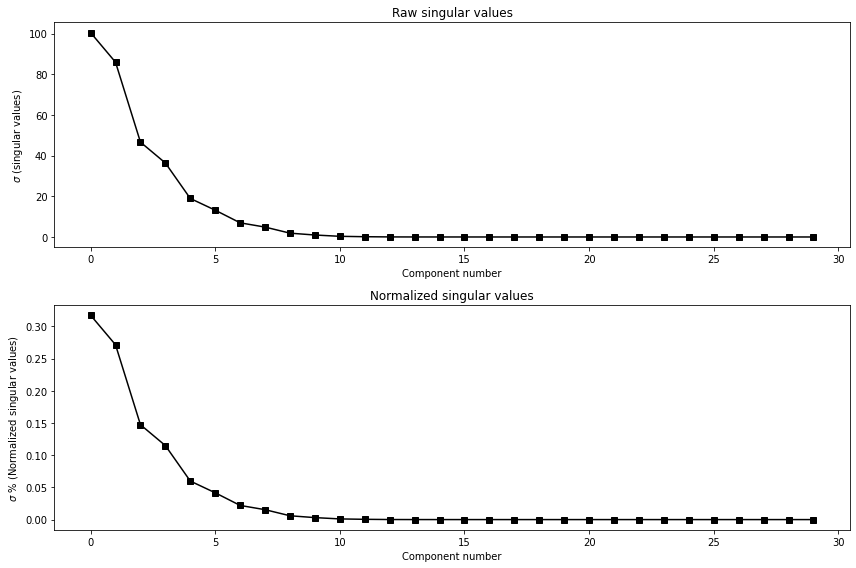

In [54]:
np.random.seed(2)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

# SVD
U, S, V = np.linalg.svd(A)

# Normalize singular value
S_normalized = S / np.sum(S)

# Visualize
fig = plt.subplots(1, figsize=(12, 8))

plt.subplot(211)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (singular values)')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(S_normalized, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ % (Normalized singular values)')
plt.title('Normalized singular values')

plt.tight_layout()
plt.show()

## SVD of square matrix

When a given matrix is square, by SVD equation, $U V^T$ will be possible.

$$
A = U \Sigma V^T
$$
$$
(m \times m) = (m \times m) (m \times m) (m \times m)
$$

In such case, because $U$ and $V$ are orthogonal matrices, and $U V^T$ is a stack of effects of just changing orientation (rotating) of a vector 2 times (meaning no stretching),

$$
norm(U) = 1
$$
$$
norm(V) = 1
$$
$$
nomr(U V^T) = 1
$$

But we have the different matrix multiplication results

$$
U U^T = I
$$
$$
V V^T = I
$$
$$
U V^T \neq I
$$
$$
U V^T (U V^T)^T = I
$$

In [12]:
A = np.random.randn(5, 5)
U, S, V = np.linalg.svd(A)

# 2 norm sees how much the matrix stretch another vector (i.e. Av),
# so returning 1 means no stretching
print(f'Norm U: {np.linalg.norm(U, 2):.2f}')
print(f'Norm V: {np.linalg.norm(V, 2):.2f}')
print(f'Norm U V^T: {np.linalg.norm(U @ V, 2):.2f}')
print()

print('U U^T')
print(np.round(U @ U.T, 2))
print()

print('V V^T')
print(np.round(V @ V.T, 2))
print()

print('U V^T')
print(np.round(U @ V.T, 2))
print()

print('U V^T (U V^T)^T')
print(np.round(U @ V.T @ (U @ V.T).T))
print()

Norm U: 1.00
Norm V: 1.00
Norm U V^T: 1.00

U U^T
[[ 1.  0. -0. -0.  0.]
 [ 0.  1. -0. -0.  0.]
 [-0. -0.  1. -0.  0.]
 [-0. -0. -0.  1. -0.]
 [ 0.  0.  0. -0.  1.]]

V V^T
[[ 1.  0. -0. -0.  0.]
 [ 0.  1.  0. -0. -0.]
 [-0.  0.  1.  0.  0.]
 [-0. -0.  0.  1.  0.]
 [ 0. -0.  0.  0.  1.]]

U V^T
[[-0.52  0.09 -0.78  0.06 -0.32]
 [ 0.07 -0.8   0.11  0.13 -0.57]
 [-0.75 -0.34  0.28 -0.34  0.36]
 [-0.31  0.08  0.25  0.91  0.1 ]
 [-0.26  0.48  0.48 -0.19 -0.66]]

U V^T (U V^T)^T
[[ 1.  0. -0. -0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-0.  0.  1.  0. -0.]
 [-0.  0.  0.  1. -0.]
 [ 0.  0. -0. -0.  1.]]



## SVD of orthogonal matrix

Given an orthogonal matrix $Q$,

$$
Q Q^T = I
$$

**Eigenvalues** of an identity matrix has all 1s. **SVD** of $Q$ is **eigendecomposition** of $Q^T Q$, **singular values** of $Q$ is **eigenvalues** of $Q^T Q$. So singular values of SVD of $Q$ are all 1.

In [24]:
A = np.random.randn(5, 5)

Q, R = np.linalg.qr(A)

U, S, V = np.linalg.svd(Q)

print('S, singular values')
print(S)
print()

# L: eigenvalue, W: eigenvector
L, W = np.linalg.eig(Q @ Q.T)
print('Eigenvalues')
print(L)
print()

print('Q^T Q')
print(np.round(Q.T @ Q))
print()

S, singular values
[1. 1. 1. 1. 1.]

Eigenvalues
[1. 1. 1. 1. 1.]

Q^T Q
[[ 1.  0. -0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [-0. -0.  1. -0.  0.]
 [ 0.  0. -0.  1. -0.]
 [ 0. -0.  0. -0.  1.]]



## Moore-Penrose pseudoinverse by SVD

**Pseudoinverse** is approximated inverse of non-invertible matrix. **Moore-Penrose pseudoinverse** is not the only way to compute pseudoinverse, but it's the most common way.

Inverse in terms of **SVD** of a full-rank matrix $A$ is,

$$
A = U \Sigma V^T
$$
$$
A^{-1} = (U \Sigma V^T)^{-1}
$$

In the right-hand side, each matrix is invertible, because $U$ and $V$ are orthogonal matrix (invertible), and $\Sigma$ is a diagonal matrix with all diagonal elements non-zero, because we assume the given matrix $A$ is a full-rank. And by **LIVE EVIL rule**,

$$
A^{-1} = V^{-T} \Sigma^{-1} U^{-1}
$$

Because orthogonal matrix is $B^{-1} = B^T$, so $B^{-T} = B^{TT} = B$,

$$
A^{-1} = V \Sigma^{-1} U^T
$$

So from SVD perspective, inverse of the given matrix is just swap $U$ and $V$ and get the inverse of diagonal matrix with **singular values**. Inverse of a diagonal matrix $\Sigma$ is,

$$
\Sigma =
\begin{bmatrix}
a & 0 & 0\\
0 & b & 0\\
0 & 0 & c
\end{bmatrix}
$$
$$
\Sigma^{-1} =
\begin{bmatrix}
1/a & 0 & 0\\
0 & 1/b & 0\\
0 & 0 & 1/c
\end{bmatrix}
$$

In **pseudoinverse**, inverse of diagonal matrix is defined by taking reciprocal of non-zero elements, and with superscript $*$

$$
\Sigma =
\begin{bmatrix}
a & 0 & 0\\
0 & b & 0\\
0 & 0 & 0
\end{bmatrix}
$$
$$
\Sigma^{*} =
\begin{bmatrix}
1/a & 0 & 0\\
0 & 1/b & 0\\
0 & 0 & 0
\end{bmatrix}
$$

And just do the same inverse of SVD matrices

$$
A = U \Sigma V^T
$$
$$
A^{*} = (U \Sigma V^T)^{*}
$$
$$
A^{*} = V^{-T} \Sigma^{*} U^{-1}
$$
$$
A^{*} = V \Sigma^{*} U^T
$$

So $A^{*} A$ should be close to an identity matrix.

In [48]:
# Make a reduced-rank matrix for pseudoinverse
# because 2nd column is linear multiple of 1st column
A = np.array([
    [1, 2, 3],
    [1, 2, 4],
    [1, 2, 5]
])

# SVD
U, S, V = np.linalg.svd(A)

print('Eigenvalue')
print(np.round(S, 3))
print()

# Compute pseudoinverse
# Because eigenvalue won't be exactly 0, so by threshold cut off to be 0
threshold = 10**-14
non_zero_eigenvalue_flag = S > threshold
# Don't apply reciprocal to super tiny eigenvalue
Si = np.copy(S)
Si[non_zero_eigenvalue_flag] = 1 / S[non_zero_eigenvalue_flag]

print('Sigma*, reciprocal of eigenvalues')
print(np.round(Si, 3))
print()

# V.T because np.linalg.svd() originally returns transpose V
Ai = V.T @ np.diag(Si) @ U.T

print('Pseudoinverse manually computed')
print(np.round(Ai, 3))
print()

print('Pseudoinverse by numpy')
print(np.round(np.linalg.pinv(A), 3))
print()

print('A^* A by manually computed')
print(np.round(Ai @ A, 1))
print()

print('A^* A by numpy')
print(np.round(np.linalg.pinv(A) @ A, 3))
print()

Eigenvalue
[8.033 0.682 0.   ]

Sigma*, reciprocal of eigenvalues
[0.124 1.467 0.   ]

Pseudoinverse manually computed
[[ 0.467  0.067 -0.333]
 [ 0.933  0.133 -0.667]
 [-0.5    0.     0.5  ]]

Pseudoinverse by numpy
[[ 0.467  0.067 -0.333]
 [ 0.933  0.133 -0.667]
 [-0.5    0.     0.5  ]]

A^* A by manually computed
[[0.2 0.4 0. ]
 [0.4 0.8 0. ]
 [0.  0.  1. ]]

A^* A by numpy
[[ 0.2  0.4  0. ]
 [ 0.4  0.8  0. ]
 [-0.  -0.   1. ]]



## Left inverse by SVD

The matrix $A^T A$ is an invertible mxm symmetric matrix, so $(A^T A)^{-1} A^T A = I$. We say $(A^T A)^{-1} A^T$ is **left inverse** of $A$. Left inverse is only possible when $A$ is a full-rank, but when $A$ is a reduced-rank, if you convert $A$ into SVD form and can compute **Moore-Penrose pseudoinverse**. When $A$ is a tall matrix and its SVD is $U \Sigma V^T$, **left inverse** can be computed as $V \Sigma U^T$.

Because of SVD, we have,

$$
A = U \Sigma V^T
$$

Left inverse of $A$ is,

$$
(A^T A)^{-1} A^T
$$

Substitute SVD to the equation by $A = U \Sigma V^T$,

$$
(A^T A)^{-1} A^T = ((U \Sigma V^T)^T U \Sigma V^T )^{-1} (U \Sigma V^T)^T
$$

By **LIVE EVIL rule**,

$$
(A^T A)^{-1} A^T = (V^{TT} \Sigma^T U^T U \Sigma V^T)^{-1} V^{TT} \Sigma^T U^T
$$

Because transpose of a transposed matrix is just an original matrix, $B^{TT} = B$, and transpose of a diagonal matrix just remain the same diagonal matrix, $D^T = D$,

$$
(A^T A)^{-1} A^T = (V \Sigma U^T U \Sigma V^T)^{-1} V \Sigma U^T
$$

For orthogonal matrix $U$, $U^T = U^{-1}$, and $U^{-1} U = I$

$$
(A^T A)^{-1} A^T = (V \Sigma I \Sigma V^T)^{-1} V \Sigma U^T
$$
$$
(A^T A)^{-1} A^T = (V \Sigma \Sigma V^T)^{-1} V \Sigma U^T
$$

Becuase matrix multiplication of diagonal matrix is just take powers of diagonal elements, $D D = D^2$,

$$
(A^T A)^{-1} A^T = (V \Sigma^2 V^T)^{-1} V \Sigma U^T
$$

By **LIVE EVIL rule** again but to inverse this time

$$
(A^T A)^{-1} A^T = V^{-T} \Sigma^{-2} V^{-1} V \Sigma U^T
$$

Because for orthogonal matrix, $B^{-1} = B^{T}$, so $V^{-T} = V^{TT} = V$,

$$
(A^T A)^{-1} A^T = V \Sigma^{-2} V^{-1} V \Sigma U^T
$$

Because of $B^{-1} B = I$ again, 

$$
(A^T A)^{-1} A^T = V \Sigma^{-2} I \Sigma U^T
$$
$$
(A^T A)^{-1} A^T = V \Sigma^{-2} \Sigma U^T
$$

In $\Sigma^{-2} \Sigma$, $1/a^2 \times a = 1/a$ in diagonal elements, 

$$
(A^T A)^{-1} A^T = V \Sigma^{-1} U^T
$$

This form is the same as the inverse of a matrix $A$ by SVD

$$
A = U \Sigma V^T
$$
$$
A^{-1} = (U \Sigma V^T)^{-1} = V \Sigma^{-1} U^T
$$

## Condition number by SVD

**Condition number** $\kappa$ is defined as the ratio of the largest **singular value** $\sigma_{max}$ and the smallest $\sigma_{min}$ like below,

$$
\kappa = \frac{\sigma_{max}} {\sigma_{min}}
$$

Condition number of a **singluar matrix** is not defined, because singular matrix has at least one 0-valued singular value, so we cannot do division by 0. As a matrix gets closer to a singular matrix, minimum singular value gets smaller, so the divisor gets smaller, so the condition number get larger.

By condition number, people say,
- **ill-condition** when condition number is **large**
- **well conditioned** when condition number is **small**

But ill-condition does not mean there's something wrong with a given matrix. Informative matrix could have a large condition number (so called ill-condition), and a random noisy non-informative matrix could have a small condition number (called well condition even if there's no information). So we cannot make any conclusion about a matrix just by looking at the condition number.

In statistics, condition number is used as an indicator of the reliability and sensitivity of a matrix. A matrix with a large condition number is more sensitive to a small perturbation.

Max singular value: 187.2
Min singular value: 1.1788543543232065e-06
Condition number: 158,787,825.0


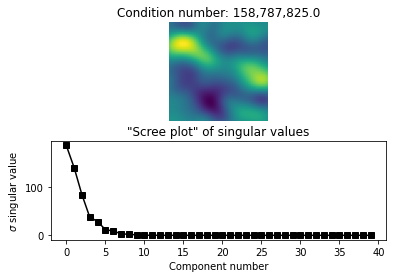

In [11]:
np.random.seed(3)

# Make a smoothing random matrix
m = 40
k = int((m + m) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = np.random.randn(m, m)
A = scipy.signal.convolve2d(A, g2d, 'same')

# SVD, only getting singular value
S = np.linalg.svd(A)[1]

# Compute condition number
# because singular value output is ordered in descending
# S[0] is max and S[-1] is min
condition_number = S[0] / S[-1]

print(f'Max singular value: {S[0]:,.1f}')
print(f'Min singular value: {S[-1]}')
print(f'Condition number: {S[0] / S[-1]:,.1f}')

# Visualize
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title(f'Condition number: {condition_number:,.1f}')

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ singular value')
plt.title('"Scree plot" of singular values')

plt.show()

Max singular value: 11.5
Min singular value: 0.19364899247412676
Condition number: 59.3


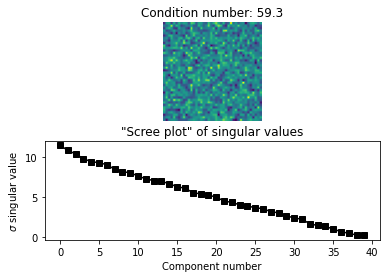

In [12]:
# See condition number of a purely random matrix
A = np.random.randn(m, m)

# SVD, only getting singular value
S = np.linalg.svd(A)[1]

# Compute condition number
# because singular value output is ordered in descending
# S[0] is max and S[-1] is min
condition_number = S[0] / S[-1]

print(f'Max singular value: {S[0]:,.1f}')
print(f'Min singular value: {S[-1]}')
print(f'Condition number: {S[0] / S[-1]:,.1f}')

# Visualize
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title(f'Condition number: {condition_number:,.1f}')

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ singular value')
plt.title('"Scree plot" of singular values')

plt.show()

Condition number of a matrix created: 42.0
Specified condition number: 42.0



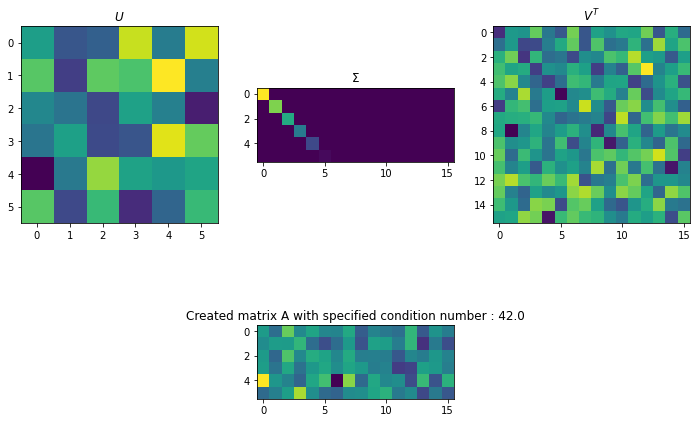

In [22]:
np.random.seed(4)

# Create a matrix which has a specified condition number
condition_number = 41.99

# Create singular vector matrices and singular value matrix
# Singular vector matrices need to be orthogonal matrices, 
# so use QR decomposition to make a orthogonal matrix from a random matrix
m = 6
n = 16
U, _ = np.linalg.qr(np.random.randn(m, m))
V, _ = np.linalg.qr(np.random.randn(n, n))

# Set max singular value to be the condition number and min singular value to be 1
# so division returns condition number
# We don't care about the rest of singular values in the middle
# Singular values need to be descending order

# Make singular values
s = np.linspace(condition_number, 1, np.min([m, n]))

# Make singular value diagonal matrix
S = np.zeros((m, n))
for i in range(len(s)):
    S[i, i] = s[i]
    
# Create a matrix with a specified condition number by SVD
A = U @ S @ V.T

# Compute condition number by Numpy
condition_number_np = np.linalg.cond(A)

print(f'Condition number of a matrix created: {condition_number_np:.1f}')
print(f'Specified condition number: {condition_number:.1f}')
print()

# Visualize
fig = plt.subplots(1, figsize=(12, 8))

plt.subplot(231)
plt.imshow(U)
plt.title('$U$')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V.T)
plt.title('$V^T$')

plt.subplot(235)
plt.imshow(A)
plt.title(f'Created matrix A with specified condition number : {condition_number_np:.1f}')

plt.show()

## Difficulty of computing inverse from SVD condition number view

For a matrix with a **large size** and a **high condition number**, its **inverse** is **unstable**, meaning the matrix times its inverse doesn't produce an identity matrix.

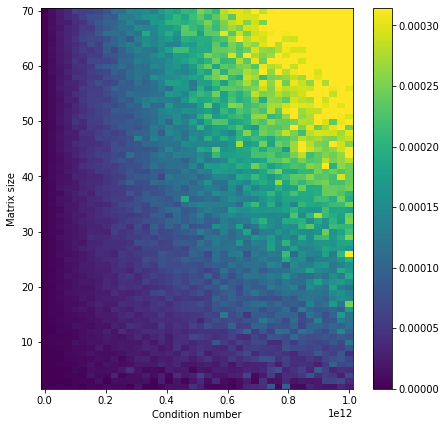

In [30]:
np.random.seed(5)

# Matrix size range: From 2 to 70
matrix_sizes = np.arange(2, 71)

# Condition number range: 40 numbers from 10 to 1e12
condition_numbers = np.linspace(10, 1e12, 40)

# Store the difference between computed identity matrix and correct identity matrix
inv_diffs = np.zeros((len(matrix_sizes), len(condition_numbers)))

# Compute inverse in the range
for row, curr_size in enumerate(matrix_sizes):
    for col, curr_condition_number in enumerate(condition_numbers):
        
        # Create A by SVD with a specified size and condition number
        U = np.linalg.qr(np.random.randn(curr_size, curr_size))[0]
        V = np.linalg.qr(np.random.randn(curr_size, curr_size))[0]
        S = np.diag(np.linspace(curr_condition_number, 1, curr_size))
        A = U @ S @ V.T
        
        # Compute difference from identity matrix
        I = A @ np.linalg.inv(A)
        
        if row == 0 and col == 0:
            most_correct_i = I
        if row == len(matrix_sizes) - 1 and col == len(condition_numbers) - 1:
            least_correct_i = I
        
        I_diff = np.abs(I - np.eye(curr_size))
        
        # Store the 2 norm 
        inv_diffs[row][col] = np.linalg.norm(I_diff)

# Visualize
fig = plt.figure(figsize=(7, 7))
plt.pcolor(condition_numbers, matrix_sizes, inv_diffs, vmax=np.max(inv_diffs) * 0.6)
plt.xlabel('Condition number')
plt.ylabel('Matrix size')
plt.colorbar()

plt.show()

[[ 1. -0.]
 [-0.  1.]]


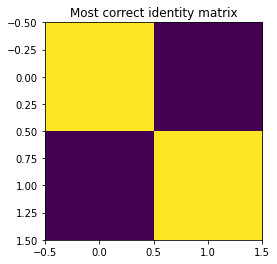

In [45]:
print(np.round(most_correct_i, 7))

plt.imshow(most_correct_i)
plt.title('Most correct identity matrix')
plt.show()

[[ 9.9999720e-01  1.0800000e-05  3.0000000e-07 ... -3.0000000e-07
  -6.9000000e-06 -1.4000000e-06]
 [ 2.6000000e-06  1.0000025e+00 -0.0000000e+00 ... -9.5000000e-06
  -1.6000000e-06 -3.0000000e-07]
 [ 2.4000000e-06 -1.4000000e-06  1.0000000e+00 ... -2.4000000e-06
   1.0500000e-05 -2.0000000e-06]
 ...
 [-3.8000000e-06 -1.0000000e-06 -1.0000000e-07 ...  9.9999620e-01
   6.7000000e-06 -6.0000000e-07]
 [ 4.0000000e-06 -1.6000000e-06  0.0000000e+00 ...  2.6000000e-06
   1.0000120e+00  2.3000000e-06]
 [ 2.7000000e-06  6.2000000e-06  0.0000000e+00 ... -2.4000000e-06
   7.0000000e-06  1.0000043e+00]]


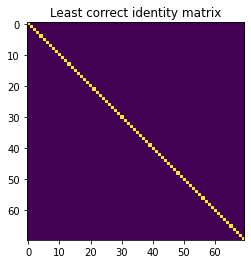

In [46]:
print(np.round(least_correct_i, 7))

plt.imshow(least_correct_i)
plt.title('Least correct identity matrix')
plt.show()